In [2]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import sklearn.decomposition as decomposition
import sklearn.ensemble as ensemble
import sklearn.svm as svm
import sklearn.ensemble as ens
from scipy.sparse import eye_array

import utils

In [3]:
import dataGenerator
import utils as u
import featureSelectionMethods as fs
import metricEvaluator as mev
importlib.reload(fs)
importlib.reload(u)
importlib.reload(dataGenerator)

<module 'dataGenerator' from 'C:\\Users\\18pep\\Documents\\sem_I\\DVaE\\clustering_dimensions_reduction\\feature_selection\\dataGenerator.py'>

In [ ]:
def find_bucket(buckets,item):
    for key in buckets.keys():
        if item <=buckets[key]:
            return key

In [ ]:
buckets={"relevant":4,"irrelevant":9,"correlated":14,"redundant":19}
list(buckets.keys())

In [ ]:
def task_1_B(ths,n_rel,method,generator,y_true):
    counters={"relevant":0,"irrelevant":0,"correlated":0,"redundant":0}
    metrics=["Bolon_Canedo","accuracy","F1"]
    
    metrics_val={}
    for metric in metrics:
        metrics_val[metric]=[]
    its=[]    
    for i in range(100):
        X,y=generator()
        all=np.arange(X.shape[1])
        model=fs.featureSelector(n=n_rel)
        y_pred=getattr(model,method)(X,y)
        
        mete=mev.metricEvaluator(y_pred,y_true,all)
        for metric in metrics:
            val=getattr(mete,metric)()
            metrics_val[metric].append(val)
        
        for j in y_pred:
            bucket=find_bucket(ths,j)
            counters[bucket]+=1
        its.append(i)
    plt.figure(figsize=(16,8))
    plt.xlabel("Iterations")
    plt.ylabel("metrics")
    plt.title(f"Feature Selection Method: {method} {n_rel} features")
    for metric in metrics:
        plt.plot(metrics_val[metric],label=metric)
    plt.legend()
    plt.savefig(f"plots\\{method}_{n_rel}_features.png")
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.xlabel("types")
    plt.ylabel("count")
    plt.title(f"Types of features selected: {method} {n_rel} features")
    for key in counters.keys():
        plt.bar(key,counters[key],label=key)
    plt.savefig(f"plots\\{method}_{n_rel}_types.png")
    plt.show()
    
            
        

In [ ]:
buckets={"relevant":4,"irrelevant":9,"correlated":14,"redundant":19}
y_true=np.arange(5)
methods=["ANOVA_filter","mutual_info_filter","SVM_wrapper","Logistic_wrapper"]
for method in methods:    
    task_1_B(buckets,5,method,u.direct_build_20,y_true)


In [ ]:
buckets={"relevant":9,"irrelevant":19,"correlated":29,"redundant":39}
y_true=np.arange(10)
methods=["ANOVA_filter","mutual_info_filter","SVM_wrapper","Logistic_wrapper"]
for method in methods:    
    task_1_B(buckets,10,method,u.direct_build_40,y_true)


In [14]:
import json
import featureExtractor as fe
import sklearn.metrics as metrics
import sklearn.model_selection as ms

In [11]:
def cross_validate_models(fun,fun_name,rel):
    fs_methods=["all_features","relevant_features","ANOVA_filter","mutual_info_filter","SVM_wrapper","Logistic_wrapper","PCA_projection"]
    
    SVM_d={}
    R_d={}
    for fs_method in fs_methods:
        SVM_d[fs_method]=[]
        R_d[fs_method]=[]
    for i in range(30):
        X,Y=u.direct_build_20()
        ext=fe.featureExtractor(X,Y,rel)
        folder=ms.KFold(n_splits=10,shuffle=True,random_state=i)
        for k,(train,test) in enumerate(folder.split(X)):
            print(k)
            for fs_method in fs_methods:
                x,y=getattr(ext,fs_method)()
                x_train,x_test=x[train],x[test]
                y_train,y_test=y[train],y[test]
                svm_pred=svm.SVC(kernel="linear").fit(x_train,y_train).predict(x_test)
                rf_pred=ensemble.RandomForestClassifier().fit(x_train,y_train).predict(x_test)
                SVM_d[fs_method].append(fun(y_test,svm_pred))
                R_d[fs_method].append(fun(y_test,rf_pred))
    return SVM_d,R_d
    

In [13]:
funs=[metrics.accuracy_score,metrics.f1_score
        ,metrics.recall_score,metrics.precision_score]
metrics_names=["accuracy","F1","recall","precision"]
for fun,name in zip(funs,metrics_names):
    a,b=cross_validate_models(fun,name,np.arange(8))
    with open("model_data/"+name+"_SVM.json","w") as f:
        json.dump(a,f)
    with open("model_data/"+name+"_RF.json","w") as f:
        json.dump(b,f)

KeyboardInterrupt: 

In [20]:
import os
import pandas as pd
import seaborn as sns

accuracy_RF.json
accuracy_SVM.json
F1_RF.json
F1_SVM.json
precision_RF.json
precision_SVM.json
recall_RF.json
recall_SVM.json


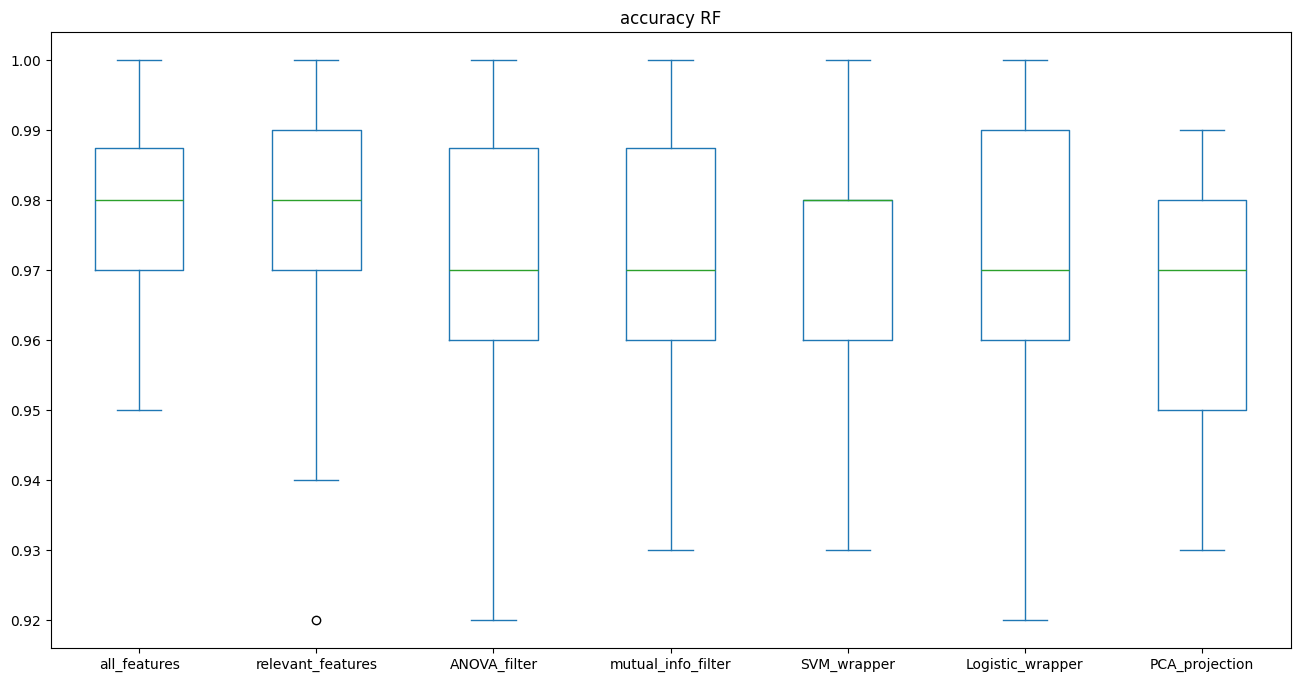

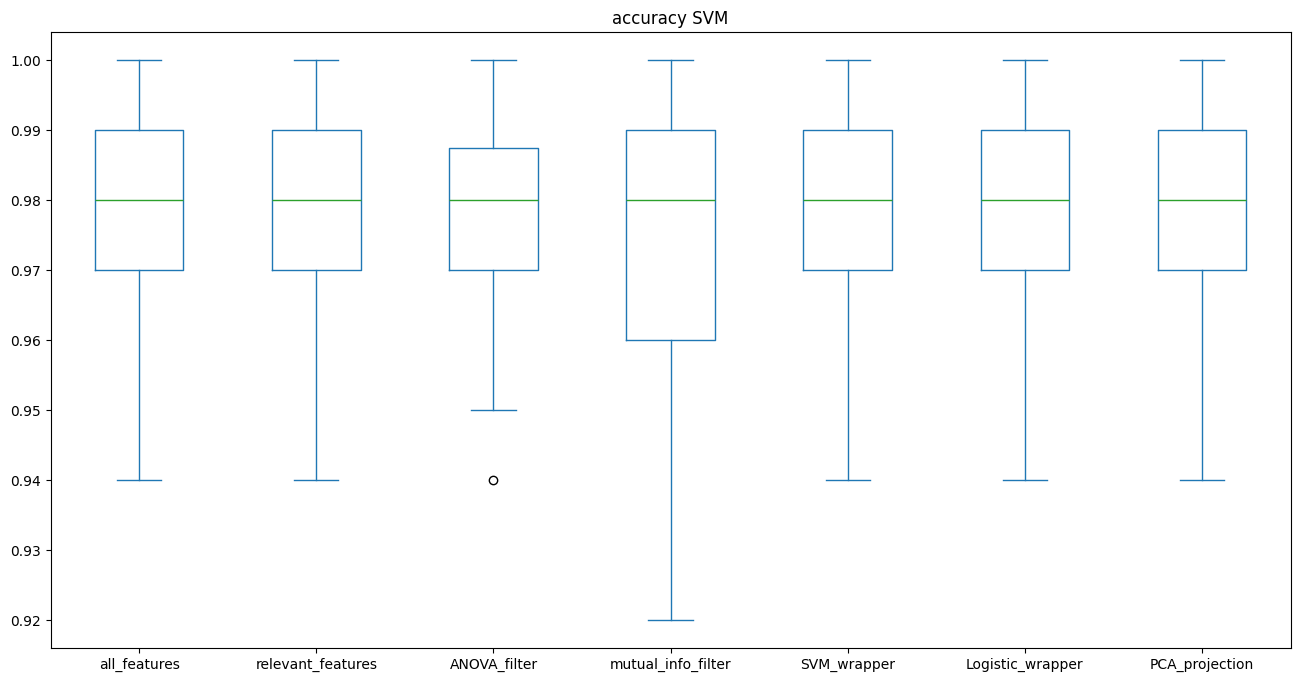

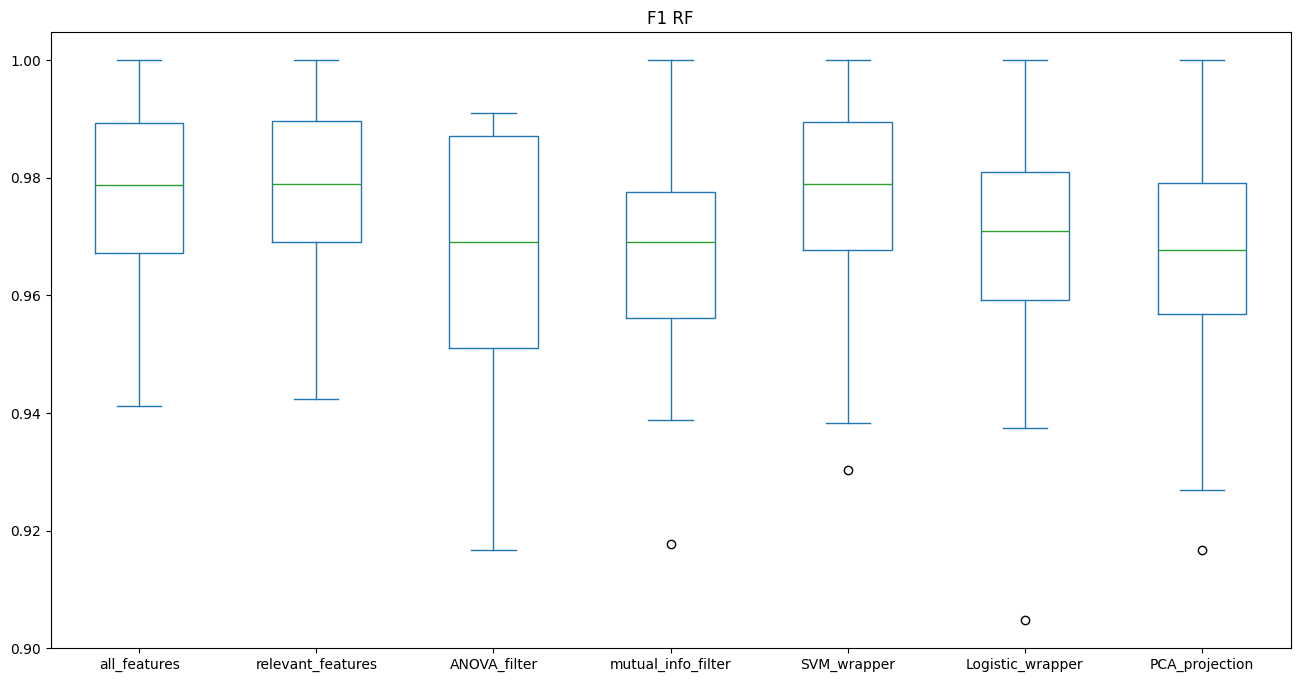

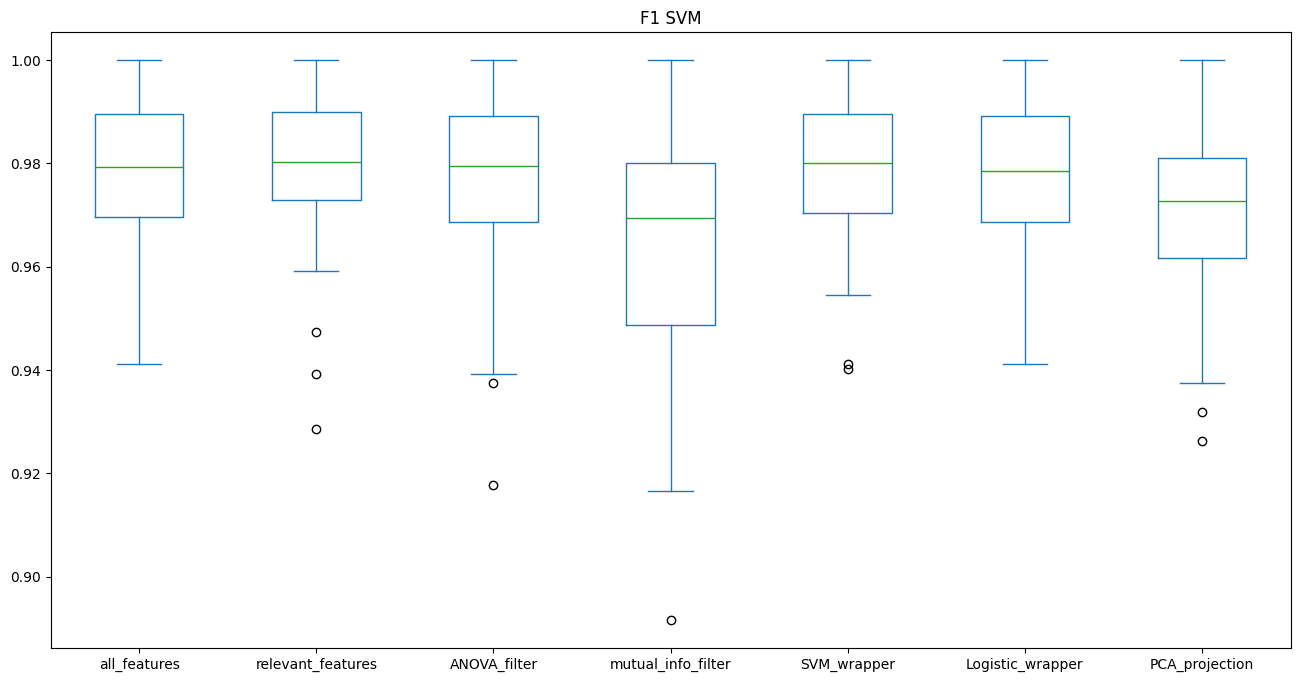

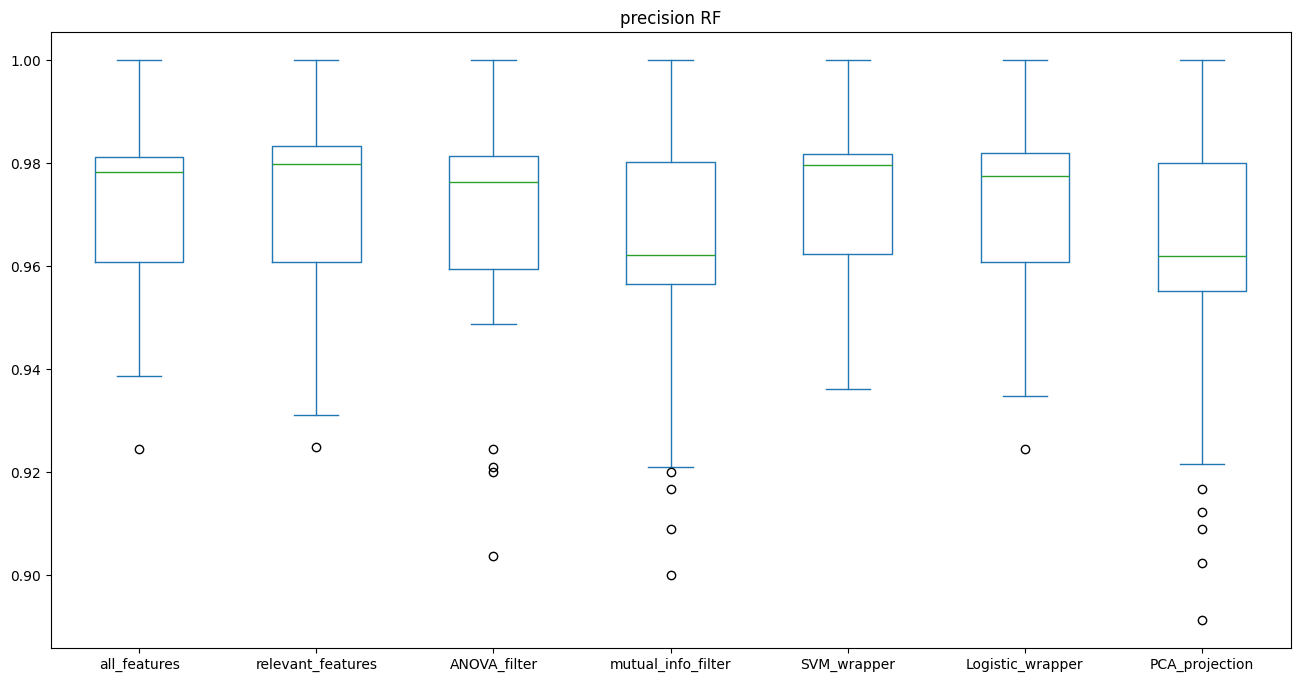

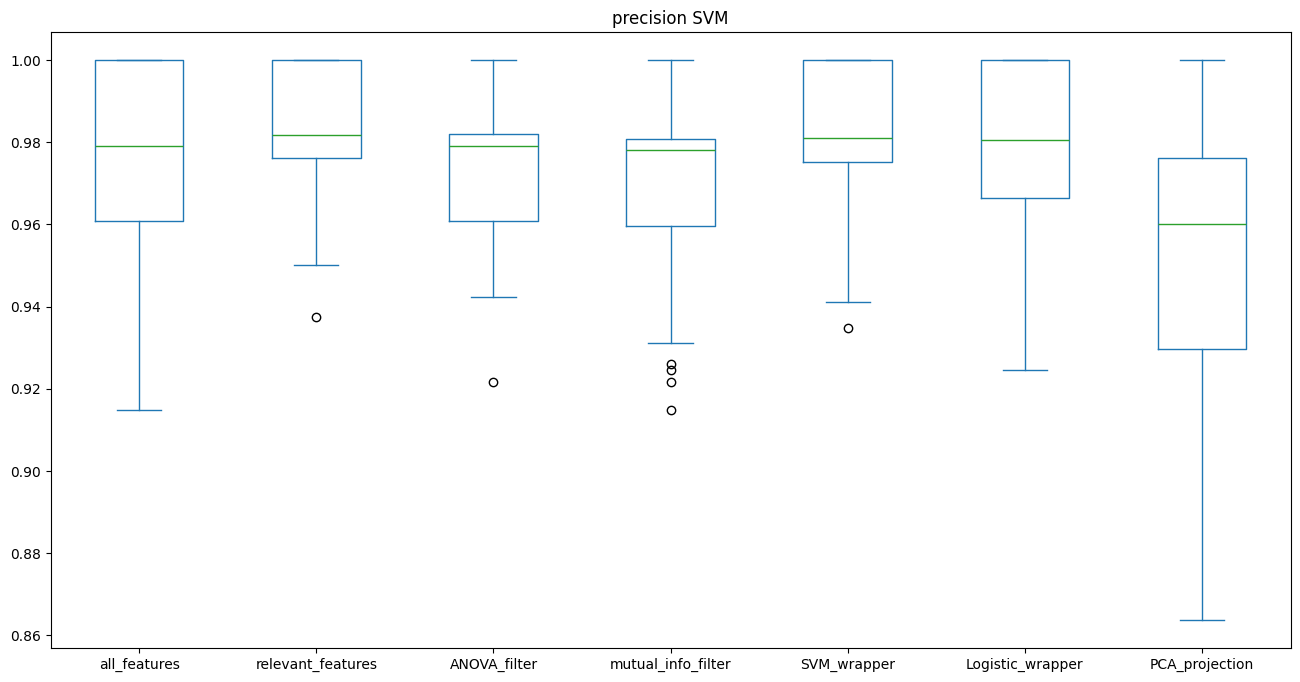

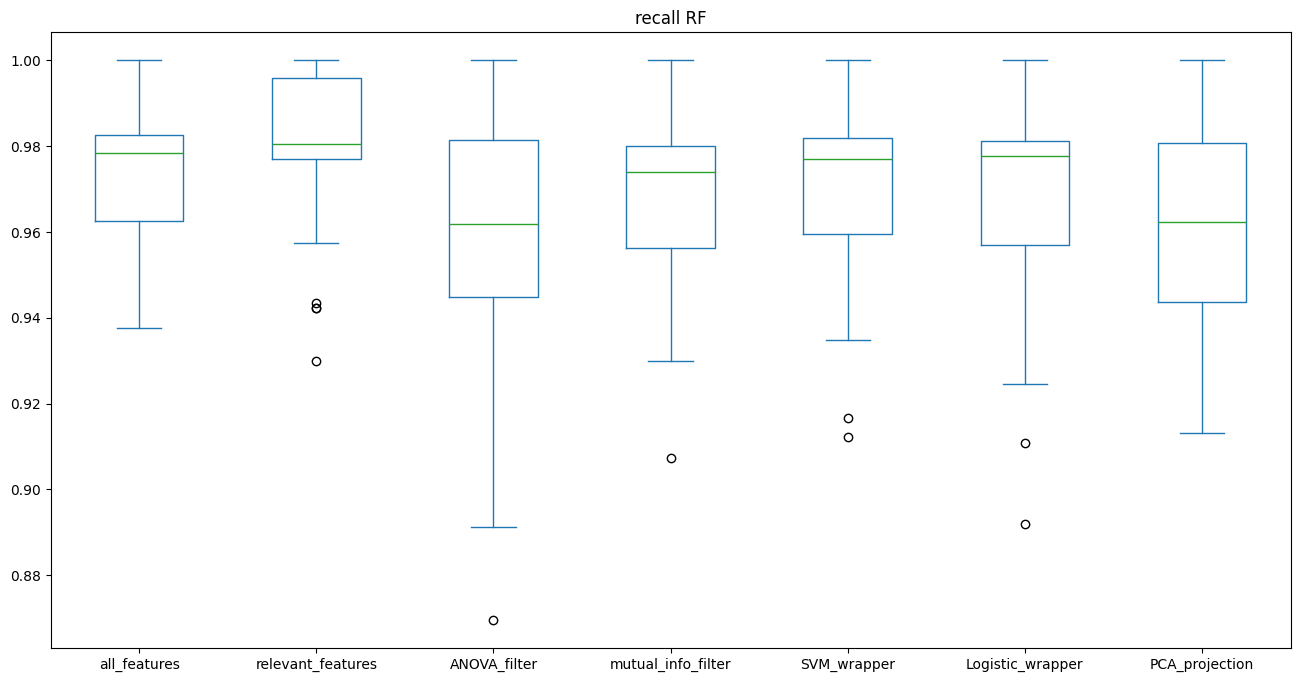

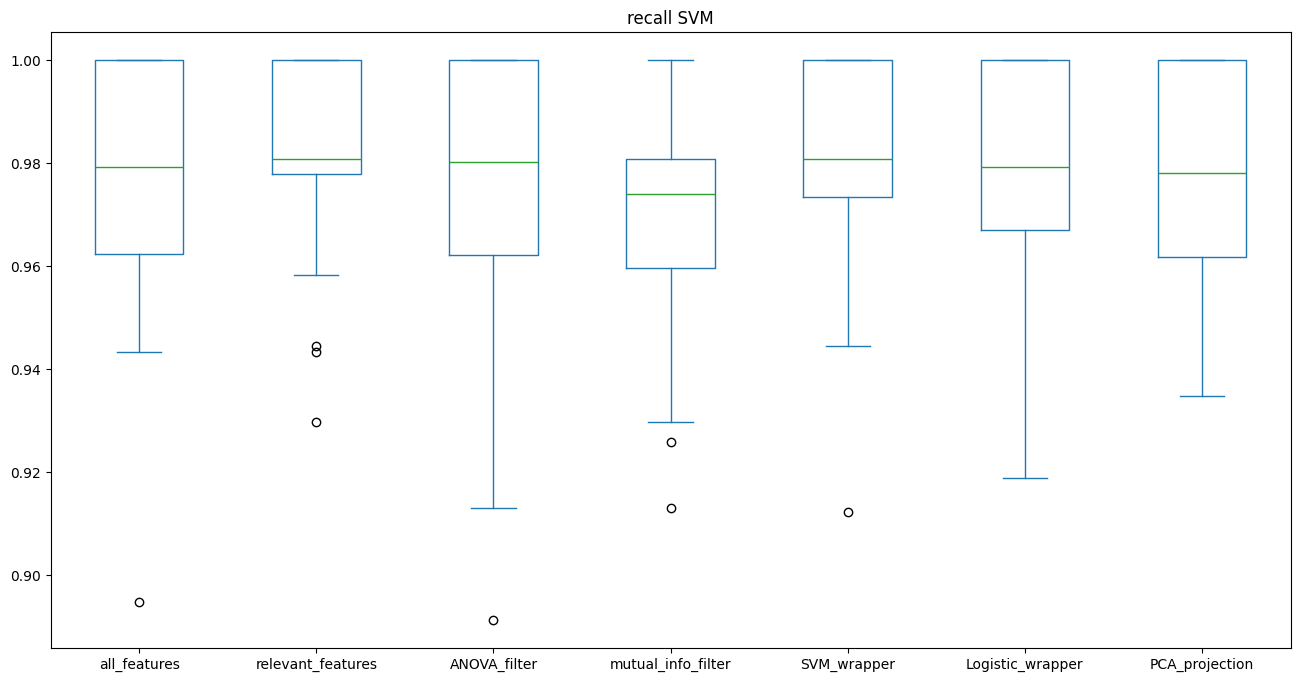

In [30]:
for f in os.listdir("./model_data"):
    print(f)
    with open("model_data/"+f) as fp:
        data=json.load(fp)
    df=pd.DataFrame(data)
    df.plot(kind="box",figsize=(16,8),title=f.split(".")[0].replace("_"," "))
    plt.savefig("models/"+f.split(".")[0]+".png")

In [32]:
import utils
importlib.reload(utils)
utils.generate_boxplots("models")

generating +accuracy_RF.png
generating +accuracy_SVM.png
generating +F1_RF.png
generating +F1_SVM.png
generating +precision_RF.png
generating +precision_SVM.png
generating +recall_RF.png
generating +recall_SVM.png


C:\Users\18pep\Documents\sem_I\DVaE\clustering_dimensions_reduction\feature_selection\utils.py:26: SyntaxWarning: invalid escape sequence '\i'
  base=""" \\begin{{frame}}{{}}
